### Import everything necessary to build the models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_roc_curve

### Download packages for nltk

In [2]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Siim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Siim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Read in news data

In [3]:
true1 = pd.read_csv("./Datasets/true.csv")
true2 = pd.read_csv("./Datasets/mix_true.csv")
fake1 = pd.read_csv("./Datasets/fake.csv")
fake2 = pd.read_csv("./Datasets/mix_fake.csv")

In [4]:
true1.head()

,title,text,date
0,as u.s budget fight looms republicans flip t...,washington reuters the head of a conservat...,2017-12-31
1,u.s military to accept transgender recruits o...,washington reuters transgender people will...,2017-12-29
2,senior u.s republican senator let mr muell...,washington reuters the special cou.sel inv...,2017-12-31
3,fbi ru.sia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,2017-12-30
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,2017-12-29


In [5]:
fake2.head()

,title,text,date
0,intl community still financing protecting terr...,st century wire says wire reported on friday ...,2016-10-26
1,fbi director comeys leaked memo explains why h...,in a stunning turn of events days before the ...,2016-10-29
2,fbi redux whats behind new probe into hillary ...,a tidal wave of revelations is pouring out of ...,2016-10-29
3,party corruption clinton campaign directly tie...,november by wire comments patrick hennings...,2016-11-01
4,hillarys ru.sian hack hoax the biggest lie of ...,november by shawn helton comment shawn hel...,2016-11-01


### Assign a class value of 1 to legitimate news and a class value of 0 to fake news

In [6]:
true1["class"] = 1
true2["class"] = 1

In [7]:
fake1["class"] = 0
fake2["class"] = 0

### Combine all the fake and legitimate news into one dataframe

In [8]:
data = pd.concat([true1, true2, fake1,fake2], axis=0)
data

,title,text,date,class
0,as u.s budget fight looms republicans flip t...,washington reuters the head of a conservat...,2017-12-31,1
1,u.s military to accept transgender recruits o...,washington reuters transgender people will...,2017-12-29,1
2,senior u.s republican senator let mr muell...,washington reuters the special cou.sel inv...,2017-12-31,1
3,fbi ru.sia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,2017-12-30,1
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,2017-12-29,1
...,...,...,...,...
1285,how to report voter fraud crash cou.se,print sidebyside of bill clinton and danney wi...,2016-11-08,0
1286,national attention on ayotte hassan nh senate...,print have you ever noticed how washington al...,2016-11-09,0
1287,how to have honest elections,will it be representative government or thugoc...,2016-11-12,0
1288,all wars are bankers wars,for those who are too young or too unwilling t...,2016-11-18,0


### We will only be classifying the news based on text

In [9]:
data = data.drop(data.columns.difference(["text", "class"]), axis=1)

In [10]:
data

,text,class
0,washington reuters the head of a conservat...,1
1,washington reuters transgender people will...,1
2,washington reuters the special cou.sel inv...,1
3,washington reuters trump campaign adviser ...,1
4,seattle washington reuters president donal...,1
...,...,...
1285,print sidebyside of bill clinton and danney wi...,0
1286,print have you ever noticed how washington al...,0
1287,will it be representative government or thugoc...,0
1288,for those who are too young or too unwilling t...,0


### Split the data into training and test data


In [11]:
x_train, x_test, y_train, y_test = train_test_split(data["text"], data["class"], test_size=0.25)

### Vectorize the text so the models can actually interpret it

In [12]:
# We will be ignoring stop words such as "the" "and" "or"
vectorizer = TfidfVectorizer(stop_words=stopwords.words("english"))
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

### Logistic Regression model

In [13]:
log_reg = LogisticRegression()
log_reg.fit(x_train_vectorized, y_train)
pred = log_reg.predict(x_test_vectorized)
print(f"{log_reg.__class__.__name__} accuracy: {log_reg.score(x_test_vectorized, y_test)}")

LogisticRegression accuracy: 0.973899692937564


### Decision tree classifier

In [14]:
decision_tree = DecisionTreeClassifier(max_depth=100)
decision_tree.fit(x_train_vectorized, y_train)

print(f"{decision_tree.__class__.__name__} accuracy: {decision_tree.score(x_test_vectorized, y_test)}")

DecisionTreeClassifier accuracy: 0.982173319686114


### Random forest classifier

In [29]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest.fit(x_train_vectorized, y_train)

print(f"{random_forest.__class__.__name__} accuracy: {random_forest.score(x_test_vectorized, y_test)}")

RandomForestClassifier accuracy: 0.9493346980552713


### Multinomial naive Bayes model

In [28]:
multi_nb = MultinomialNB()
multi_nb.fit(x_train_vectorized, y_train)
print(f"{multi_nb.__class__.__name__} accuracy: {multi_nb.score(x_test_vectorized, y_test)}")

MultinomialNB accuracy: 0.9235755714773115


### ROC curves to show the performance of each model. Shown seperately and all on one plot.

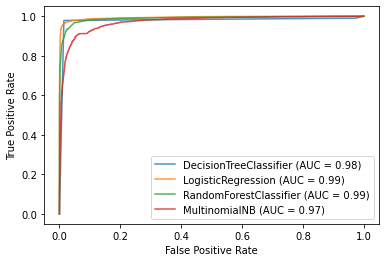

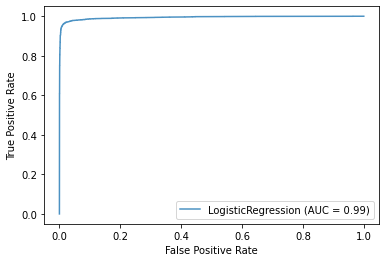

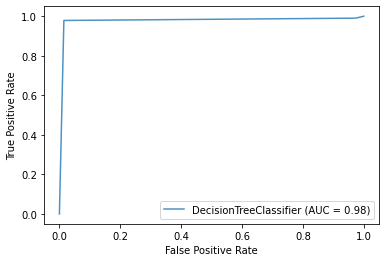

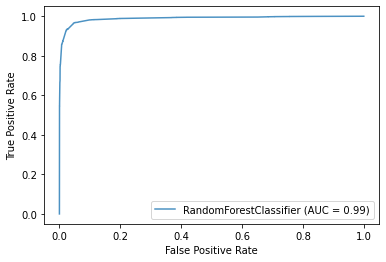

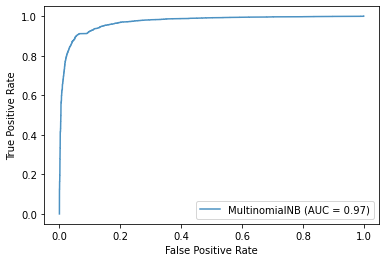

In [27]:
ax = plt.gca()
log_reg_disp = plot_roc_curve(log_reg, x_test_vectorized, y_test, alpha=0.8)
decision_tree_disp = plot_roc_curve(decision_tree, x_test_vectorized, y_test, alpha=0.8)
random_forest_disp = plot_roc_curve(random_forest, x_test_vectorized, y_test, alpha=0.8)
multi_nb_disp = plot_roc_curve(multi_nb, x_test_vectorized, y_test, alpha=0.8)
decision_tree_disp.plot(ax=ax, alpha=0.8)
log_reg_disp.plot(ax=ax,alpha=0.8)
random_forest_disp.plot(ax=ax,alpha=0.8)
multi_nb_disp.plot(ax=ax, alpha=0.8)